# Incubator 12-day program 
Action items

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Day 4

Value of Energy Cost Saving Program

Download the data set about [Value of Energy Cost Saving Program](https://data.cityofnewyork.us/City-Government/Value-of-Energy-Cost-Savings-Program-Savings-for-B/bug8-9f3g) for businesses in New York City (under the "Export" option, there is a way to retrieve a CSV file). 

In [2]:
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")
df_data = df

How many different companies are represented in the data set?

In [3]:
df = df_data
df["Company Name"].nunique()

439

What is the total number of jobs created for businesses in Queens?

In [5]:
df = df_data
(df.loc[df['Borough']=="Queens"])["Job created"].sum()

102.0

How many different unique email domains names are there in the data set?

In [6]:
df = df_data
df["company email"].str.split("@").str[-1].dropna().nunique()

361

Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [7]:
df = df_data
df = df.groupby("NTA").agg(avg_total_savings=("Total Savings",np.mean), tot_jobs_created=("Job created", sum), num_businesses=("Company Name","count"))
df_nta = df

In [8]:
#df.groupby("NTA").agg({"Total Savings":np.mean, "Job created":sum, "Company Name":'nunique'}).rename(columns=["Avg Total Savings", "Total Jobs Created", "Num Businesses"])

In [9]:
df = df_nta
df.loc[df.num_businesses>=5]
df.to_csv("milestone_action_item_day4.csv")
df.head()

,avg_total_savings,tot_jobs_created,num_businesses
NTA,,,
Astoria,11409.986667,0.0,3
Baisley Park,21522.740000,0.0,1
Battery Park City-Lower Manhattan,469890.796667,0.0,9
Bedford,62113.343333,0.0,3
Bensonhurst West,-379.470000,0.0,1


<AxesSubplot:xlabel='tot_jobs_created', ylabel='avg_total_savings'>

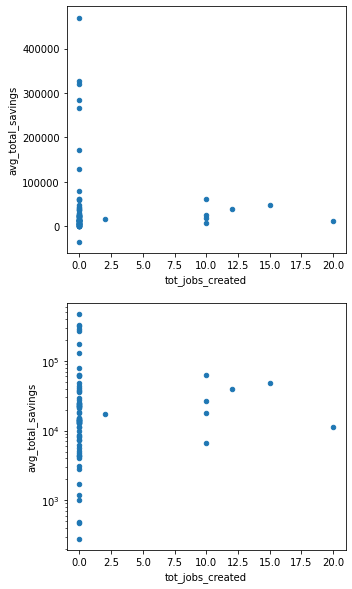

In [13]:
df = df_nta

fig, ax = plt.subplots(2,1, figsize=(5, 10))
df.plot.scatter(ax=ax[0], x="tot_jobs_created", y="avg_total_savings")
df.plot.scatter(ax=ax[1], x="tot_jobs_created", y="avg_total_savings", logy=True)

In [15]:
import seaborn as sns
sns.set_theme(color_codes=True)

[None]

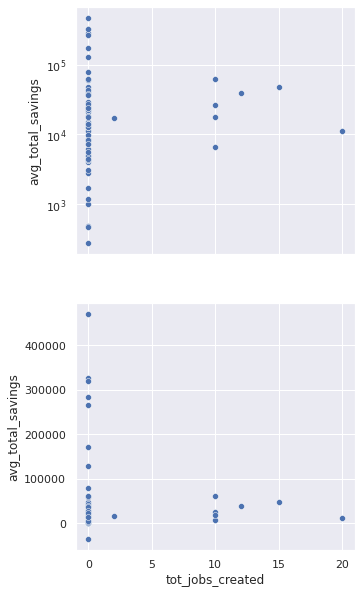

In [22]:
fig, ax = plt.subplots(2,1, figsize=(5, 10), sharex=True)
for a in ax:
    sns.scatterplot(ax=a, data=df_nta, x="tot_jobs_created", y="avg_total_savings")
ax[0].set(yscale='log')

<AxesSubplot:ylabel='Frequency'>

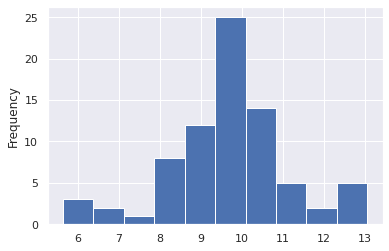

In [45]:
s = df_nta.avg_total_savings
np.log(s[s>0]).plot.hist()

<AxesSubplot:xlabel='Effective Date'>

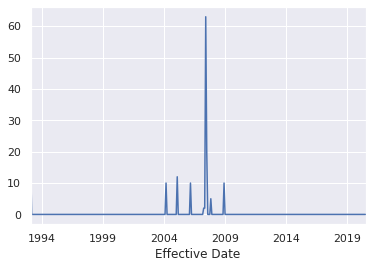

In [42]:
df = df_data
df['Effective Date'] = pd.to_datetime(df['Effective Date'], infer_datetime_format=True)  
df = df.sort_values('Effective Date')
s = df.groupby(pd.Grouper(key='Effective Date', freq='1M'))['Job created'].sum()
s.plot.line()